In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

100%|██████████| 1.47M/1.47M [00:00<00:00, 1.78MB/s]

Extracting files...


Path to dataset files: /home/vinicius/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [2]:
import pandas as pd
import os
books = pd.read_csv(os.path.join(path, "books.csv"))
display(books)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


# Analisando os dados faltantes

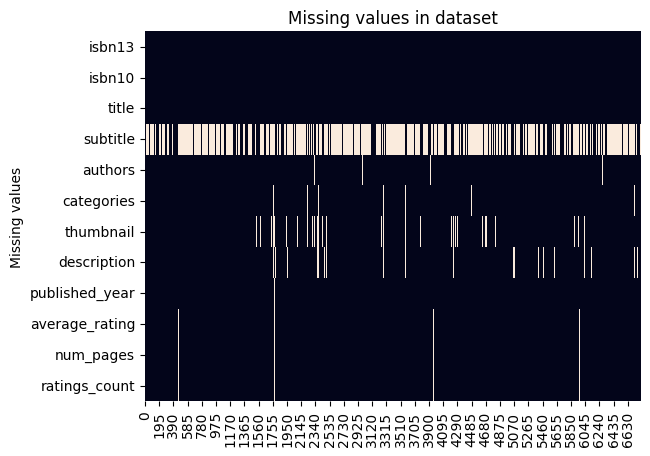

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)
ax.set_title("Missing values in dataset")
plt.ylabel("Missing values")
plt.show()

In [4]:
# Criando novas variáveis
import numpy as np

books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"] = 2025 - books["published_year"]

Text(0.5, 1.0, 'Correlation matrix')

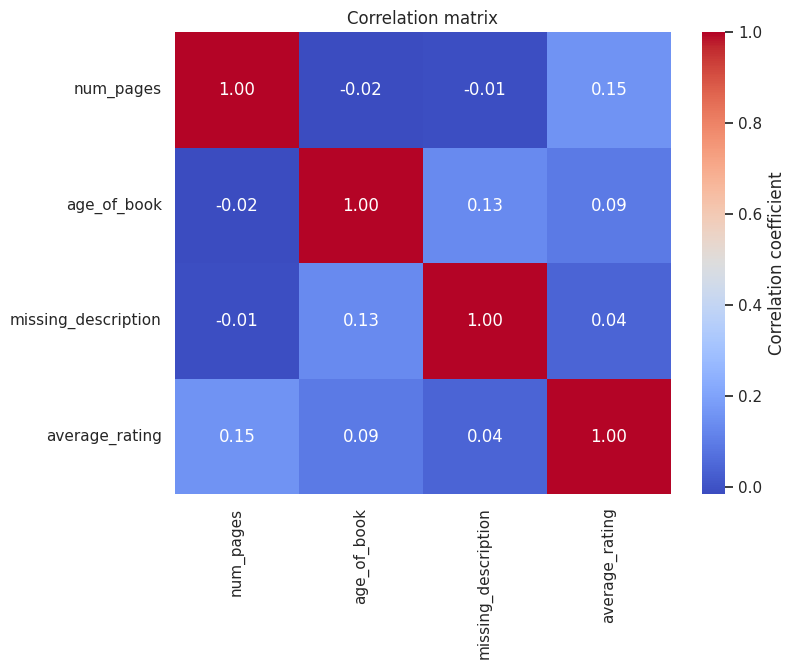

In [5]:
#selecionamos nossas colunas de interesse

columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]
correlation_matrix = books[columns_of_interest].corr(method="spearman") #bom quanto vc está lidando com dados discretos
sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"label": "Correlation coefficient"})
heatmap.set_title("Correlation matrix")

In [6]:
#Como a perda de descrição não tem correlação com nenhum outro atributo, podemos remover os livros sem descrição, assim como remover dados faltantes das outras variáveis

#Primeiro checamos quanto perderíamos de dados se removessemos os livros sem description, num_pages, average_rating e published_year

book_missing = books[(books["description"].isna()) | (books["num_pages"].isna()) | (books["average_rating"].isna()) | (books["published_year"].isna())]

print("Percentage of data lost if we remove rows with missing values:", (len(book_missing) / len(books)) * 100)
#como o valor é baixo, podemos remover os dados faltantes

books_filtered = books.dropna(subset=["description", "num_pages", "average_rating", "published_year"])
display(books_filtered)


Percentage of data lost if we remove rows with missing values: 4.4493392070484585


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


<Axes: xlabel='categories'>

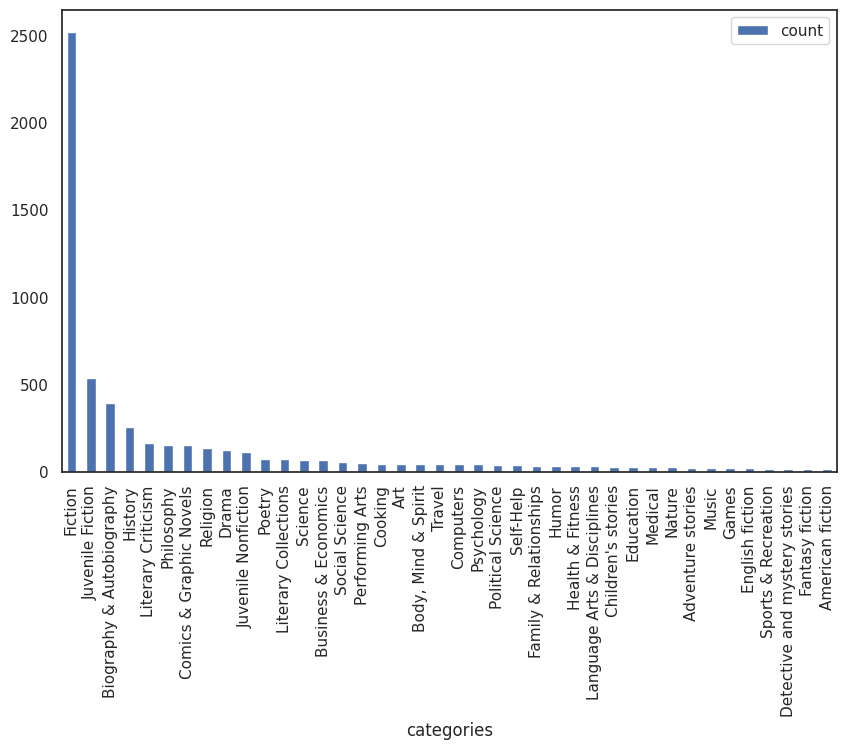

In [7]:
# Como vamos recomendar os livros pela classificação, precisamos checar como esta a distribuição de  categories	

books_filtered["categories"].value_counts().reset_index().sort_values("count", ascending=False).head(40).set_index("categories").plot(kind="bar", figsize=(10, 6))

# Percebemos que a distribuição não é normal e precisamos ver como vamos normalizar esses dados

/tmp/ipykernel_26190/1166474448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_filtered["description_word_count"] = books_filtered["description"].str.split().str.len()


<Axes: >

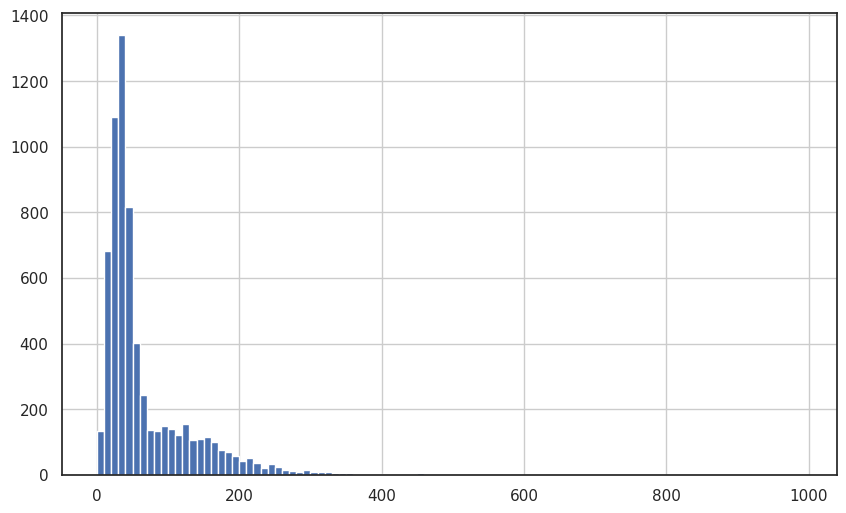

In [8]:
#No dataframe, também percebe-se que na descrição, que também será utilizada pra treinar o modelo de LLM, temos muitos valores não informativos, com informações curtas ou sem utilidade

#Vamos então filtrar pelo número de palavras:

books_filtered["description_word_count"] = books_filtered["description"].str.split().str.len()

#vamos ver num histograma com intervalos de 10 palavras

books_filtered["description_word_count"].hist(bins=range(0, 1000, 10), figsize=(10, 6))


In [9]:
# Agora vamos checar o que são essas descrições de até 10 palavras

books_filtered[books_filtered["description_word_count"] < 10]["description"].head(10)

#não são descritivas

6                                              Donation.
11                                        Fantasy-roman.
77                        Nonsense rhyming story. 4 yrs+
104                       Library of Liberal Arts title.
241    Originally published: [New York]: Clarion Book...
682                     Biography of John Wesley Powell.
748                 Includes bibliographical references.
770                                Bound For Oregon (PB)
771                     HINTON/THAT WAS THEN THIS IS NOW
775                                   No Marketing Blurb
Name: description, dtype: object

In [10]:
# Agora até 20 palavras

display(books_filtered[(books_filtered["description_word_count"] <= 20) & (books_filtered["description_word_count"] >= 10)]["description"].head(10))

#Talvez não tenha como ver bem aqui, mas ainda não está muito descritivo, mas se baixa-se num csv daria para verificar

2     Volume Two of Stephen Donaldson's acclaimed se...
10    One of Sidney Sheldon's most popular and bests...
32    Tells the story of three generations of Chines...
38    Koko is Peter Straub's foray into the psycholo...
70    A matter of life and death - and the Throne of...
83    Tie your tongue in terrible knots as you try t...
84    A study guide for the novel There's a Boy in t...
90    An epic narrative that takes a look at slavery...
94    The title story in this collection of shorts n...
95    Depicts the inner-workings of the Hollywood mo...
Name: description, dtype: object

In [11]:
# Agora até 30 palavras

display(books_filtered[(books_filtered["description_word_count"] <= 30) & (books_filtered["description_word_count"] >= 20)]["description"].head(10))

#Agora sim, temos descrições mais descritivas

9     Kate Blackwell is an enigma and one of the mos...
14    Available in the U.S. for the first time, this...
21    Reissue of the author's most famous and well-l...
36    A magical and fantastic collection of early st...
46    No one believes a little girl when she insists...
57    A young drifter finds more than he bargained f...
68    A new 'The Doors of Perception' for the 21st c...
71    It should be the most natural thing in the wor...
78    From bang-ups and hang-ups to lurches and slum...
82    A boy imagines what it would be like if he had...
Name: description, dtype: object

In [12]:
#Aumentamos um pouco por garantia

book_no_missing_words = books_filtered[books_filtered["description_word_count"] >= 25]
display(book_no_missing_words)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,description_word_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174


In [13]:
# Agora vamos criar uma variável que junta o título com o subtítulo

import numpy as np

book_no_missing_words["title_subtitle"] = np.where(
    book_no_missing_words["subtitle"].isna(), 
    book_no_missing_words["title"],
    book_no_missing_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1)
    )

display(book_no_missing_words[["title_subtitle"]].head(10))



/tmp/ipykernel_26190/3996609863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_no_missing_words["title_subtitle"] = np.where(


,title_subtitle
0,Gilead
1,Spider's Web: A Novel
3,Rage of angels
4,The Four Loves
5,The Problem of Pain
7,Empires of the Monsoon: A History of the India...
8,The Gap Into Madness: Chaos and Order
9,Master of the Game
12,Warhost of Vastmark
13,The Once and Future King


In [14]:
# Vamos também conectar os tags com as descrições

book_no_missing_words["tag_description"] = book_no_missing_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)
display(book_no_missing_words["tag_description"].head(10))

/tmp/ipykernel_26190/65581048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_no_missing_words["tag_description"] = book_no_missing_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


0     9780002005883 A NOVEL THAT READERS and critics...
1     9780002261982 A new 'Christie for Christmas' -...
3     9780006178736 A memorable, mesmerizing heroine...
4     9780006280897 Lewis' work on the nature of lov...
5     9780006280934 "In The Problem of Pain, C.S. Le...
7     9780006380832 Until Vasco da Gama discovered t...
8     9780006470229 A new-cover reissue of the fourt...
9     9780006472612 Kate Blackwell is an enigma and ...
12    9780006482079 Tricked once more by his wily ha...
13    9780006483014 An omnibus volume of the author'...
Name: tag_description, dtype: object

In [15]:
#Vamos descartar as colunas que não vamos usar

display(book_no_missing_words.columns)

(
    book_no_missing_words
        .drop(columns=["subtitle", "missing_description", "age_of_book"])
        .to_csv("books_cleaned.csv", index=False)
)


Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'missing_description', 'age_of_book',
       'description_word_count', 'title_subtitle', 'tag_description'],
      dtype='object')